# Lead Scoring Case Study

In [225]:
#importing some basic packages and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [226]:
# loading the leads dataset

leads = pd.read_csv('Leads.csv')

In [227]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [228]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [229]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [230]:
leads.shape

(9240, 37)

In [231]:
# target variable
leads['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [232]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


## Data cleaning and preparation

In [233]:
# checking for the number of null values in each column 

leads.isnull().sum(axis = 0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [234]:
# checking for the percentage of null values in each column 

round((leads.isnull().sum(axis = 0)/ len(leads.index))*100 , 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [235]:
# dropping columns with more than 30% missing values

leads = leads.drop(['Tags', 'Lead Quality','Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'], axis = 1)

In [236]:
# checking for the percentage of null values in each column 

round((leads.isnull().sum(axis = 0)/ len(leads.index))*100 , 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  15.56
How did you hear about X Education              23.89
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

### Imputing missing values and Dropping columns where imputation is not possible

##### Country column 

In [237]:
# Country column 
sum(leads['Country']=='India')/len(leads.index)

0.7025974025974026

Since maximum number of values in the country columns have "India" we are going to create 2 values for the country columns one being 'India' and the other being 'Foreign Country'

In [238]:
leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Foreign Country')
leads['Country'].value_counts()

India              6492
Foreign Country    2748
Name: Country, dtype: int64

##### Total visits column

In [239]:
# Total visits column
leads['TotalVisits'].value_counts() 

0.00      2189
2.00      1680
3.00      1306
4.00      1120
5.00       783
6.00       466
1.00       395
7.00       309
8.00       224
9.00       164
10.00      114
11.00       86
13.00       48
12.00       45
14.00       36
16.00       21
15.00       18
17.00       16
18.00       15
20.00       12
19.00        9
23.00        6
21.00        6
27.00        5
24.00        5
25.00        5
22.00        3
28.00        2
29.00        2
26.00        2
251.00       1
74.00        1
30.00        1
141.00       1
54.00        1
41.00        1
115.00       1
43.00        1
42.00        1
32.00        1
55.00        1
Name: TotalVisits, dtype: int64

In [240]:
leads['TotalVisits'].median() #Since the above column has lot of outliers we will impute with the median value

3.0

In [241]:
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)

##### Page views per visit column

In [242]:
# Page Views Per Visit column null values are similarly imputed using the median values

leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)

##### Last Activity column

In [243]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [244]:
sum(leads['Last Activity'].isnull())

103

In [245]:
leads['Last Activity'].fillna("Unknown", inplace = True)
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

##### Specialization column

In [246]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [247]:
sum(leads['Specialization'].isnull())

1438

In [248]:
leads['Specialization'].replace('Select', 'Unknown', inplace =True)
leads['Specialization'].value_counts()

Unknown                              1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [249]:
leads['Specialization'].fillna("Unknown", inplace = True)
leads['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

##### How did you hear about X Education

In [250]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

We will drop this columns as most of the values in this column is 'Select' which does not add any information to our model

In [251]:
leads = leads.drop('How did you hear about X Education', axis=1)

##### What is your current occupation column

In [252]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [253]:
sum(leads['What is your current occupation'].isnull())

2690

In [254]:
leads['What is your current occupation'].fillna("Unknown", inplace = True)
leads['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

##### What matters most to you in choosing a course column

In [255]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [256]:
sum(leads['What matters most to you in choosing a course'].isnull())

2709

We will drop this column as most of the values in this column belong to one category and others are null

In [257]:
leads = leads.drop('What matters most to you in choosing a course', axis = 1)

##### Lead Profile column

In [258]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [259]:
sum(leads['Lead Profile'].isnull())

2709

In [260]:
leads['Lead Profile'].replace('Select', 'Unknown', inplace =True)
leads['Lead Profile'].value_counts()

Unknown                        4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [261]:
leads['Lead Profile'].fillna("Unknown", inplace = True)
leads['Lead Profile'].value_counts()

Unknown                        6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

##### City column

In [262]:
# City column
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [263]:
sum(leads['City'].isnull())

1420

In [264]:
leads['City'].fillna("Unknown", inplace = True) # Replacing null values with 'NotSpecified' 
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Unknown                        1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [265]:
leads['City'].replace('Select', 'Unknown', inplace =True)
leads['City'].value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [266]:
# re-checking for the percentage of null values in each column 

round((leads.isnull().sum(axis = 0)/ len(leads.index))*100 , 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Country                                    0.00
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                 

We will remove the rows with missing values

In [267]:
leads.shape

(9240, 29)

In [268]:
# removing all the rows with null values

leads = leads.dropna()

In [269]:
leads.shape

(9204, 29)

In [270]:
# checking again for missing values in the dataframe 

round((leads.isnull().sum(axis = 0)/ len(leads.index))*100 , 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Country                                    0.00
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                 

In [271]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,No,No,No,No,Unknown,Unknown,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,No,No,No,No,Unknown,Unknown,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,No,No,No,No,Unknown,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,No,No,No,No,Unknown,Mumbai,No,No,Modified


In [272]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [273]:
for col in leads.columns:
    print(col, ':', leads[col].nunique())
    print('\n')

Prospect ID : 9204


Lead Number : 9204


Lead Origin : 4


Lead Source : 21


Do Not Email : 2


Do Not Call : 2


Converted : 2


TotalVisits : 41


Total Time Spent on Website : 1730


Page Views Per Visit : 114


Last Activity : 18


Country : 2


Specialization : 19


What is your current occupation : 7


Search : 2


Magazine : 1


Newspaper Article : 2


X Education Forums : 2


Newspaper : 2


Digital Advertisement : 2


Through Recommendations : 2


Receive More Updates About Our Courses : 1


Update me on Supply Chain Content : 1


Get updates on DM Content : 1


Lead Profile : 6


City : 7


I agree to pay the amount through cheque : 1


A free copy of Mastering The Interview : 2


Last Notable Activity : 16




In [274]:
# Prospect ID and Lead Number are the same thing so having both the columsn is redundant so we will drop the Prospect ID column

leads = leads.drop('Prospect ID',axis=1)

# Also a lot of the columns have just one unique value so they are of no use as they do not provide any information so dropping them as well
leads = leads.drop(['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content','Get updates on DM Content',
                    'I agree to pay the amount through cheque'], axis=1)

In [275]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,...,No,No,No,No,No,No,Unknown,Unknown,No,Modified
1,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,...,No,No,No,No,No,No,Unknown,Unknown,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,...,No,No,No,No,No,No,Potential Lead,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,...,No,No,No,No,No,No,Unknown,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,...,No,No,No,No,No,No,Unknown,Mumbai,No,Modified


In [276]:
print(leads.shape)

(9204, 23)


In [277]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

#### Mapping 'Yes' and 'No' to '1' and '0'

In [278]:
def mapping(x):
    return x.map({'Yes':1, 'No':0})

In [279]:
col_list = ['Search',
            'Do Not Email',
            'Do Not Call',
            'Newspaper Article',
            'X Education Forums',
            'Newspaper',
            'Digital Advertisement',
            'Through Recommendations',
            'A free copy of Mastering The Interview']

In [280]:
leads[col_list] = leads[col_list].apply(mapping)

In [281]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.00,0,0.00,Page Visited on Website,...,0,0,0,0,0,0,Unknown,Unknown,0,Modified
1,660728,API,Organic Search,0,0,0,5.00,674,2.50,Email Opened,...,0,0,0,0,0,0,Unknown,Unknown,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.00,1532,2.00,Email Opened,...,0,0,0,0,0,0,Potential Lead,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.00,305,1.00,Unreachable,...,0,0,0,0,0,0,Unknown,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.00,1428,1.00,Converted to Lead,...,0,0,0,0,0,0,Unknown,Mumbai,0,Modified


In [282]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

#### Creating dummy variables for categorical variables

In [283]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 23 columns):
Lead Number                               9204 non-null int64
Lead Origin                               9204 non-null object
Lead Source                               9204 non-null object
Do Not Email                              9204 non-null int64
Do Not Call                               9204 non-null int64
Converted                                 9204 non-null int64
TotalVisits                               9204 non-null float64
Total Time Spent on Website               9204 non-null int64
Page Views Per Visit                      9204 non-null float64
Last Activity                             9204 non-null object
Country                                   9204 non-null object
Specialization                            9204 non-null object
What is your current occupation           9204 non-null object
Search                                    9204 non-null int64
Newspaper Artic

In [284]:
# creating dummy variables for some of the other categorical columns 
leads = pd.get_dummies(leads, columns=['Lead Origin', 'Lead Source', 'Country', 'Last Notable Activity'], drop_first=True)

In [285]:
# Creating dummmy variables for the rest of the columns and dropping the level called 'Unknown'


# Creating dummy variables for the variable 'Last Activity'
dummy = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')
final_dummy = dummy.drop(['Last Activity_Unknown'], 1)
leads = pd.concat([leads,final_dummy], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
dummy = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
final_dummy = dummy.drop(['What is your current occupation_Unknown'], 1)
leads = pd.concat([leads,final_dummy], axis=1)

# Creating dummy variables for the variable 'Lead Profile'
dummy = pd.get_dummies(leads['Lead Profile'], prefix='Lead Profile')
final_dummy = dummy.drop(['Lead Profile_Unknown'], 1)
leads = pd.concat([leads,final_dummy], axis=1)

# Creating dummy variables for the variable 'Specialization'
dummy = pd.get_dummies(leads['Specialization'], prefix='Specialization')
final_dummy = dummy.drop(['Specialization_Unknown'], 1)
leads = pd.concat([leads,final_dummy], axis=1)

# Creating dummy variables for the variable 'City'
dummy = pd.get_dummies(leads['City'], prefix='City')
final_dummy = dummy.drop(['City_Unknown'], 1)
leads = pd.concat([leads,final_dummy], axis=1)

In [286]:
leads.shape

(9204, 110)

#### Dropping the columns for which we have created dummy variables

In [287]:
leads = leads.drop(['Last Activity', 'What is your current occupation', 'Lead Profile',
                   'Specialization', 'City'],axis=1)

In [288]:
leads.shape

(9204, 105)

In [289]:
leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,0,0,0,0.00,0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,660728,0,0,0,5.00,674,2.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.00,1532,2.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,660719,0,0,0,1.00,305,1.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,660681,0,0,1,2.00,1428,1.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [290]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Columns: 105 entries, Lead Number to City_Tier II Cities
dtypes: float64(2), int64(12), uint8(91)
memory usage: 1.9 MB


#### Outlier treatment

In [291]:
# checking for outliers in the continuous variables

numerical = leads[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]

In [292]:
numerical.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.00,9204.00,9204.00
mean,3.45,489.01,2.36
std,4.82,547.98,2.15
min,0.00,0.00,0.00
25%,1.00,14.00,1.00
50%,3.00,250.00,2.00
75%,5.00,938.00,3.00
max,251.00,2272.00,55.00


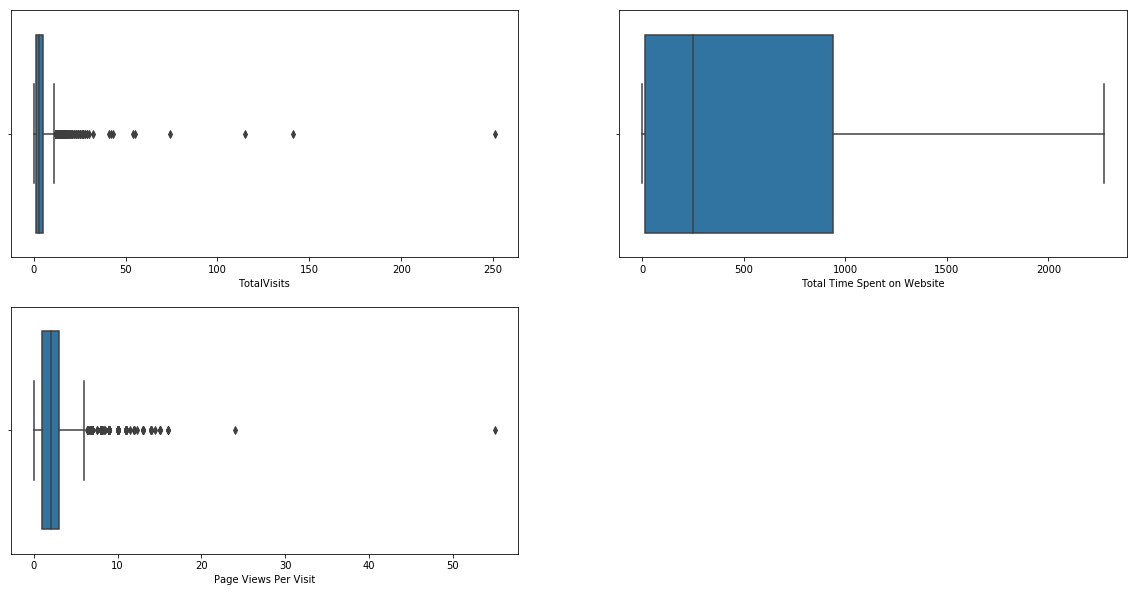

In [293]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(numerical['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(numerical['Total Time Spent on Website'])

plt.subplot(2,2,3)
sns.boxplot(numerical['Page Views Per Visit'])

In [294]:
# removing outliers using the IQR

Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads = leads.loc[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.5*IQR)]

Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

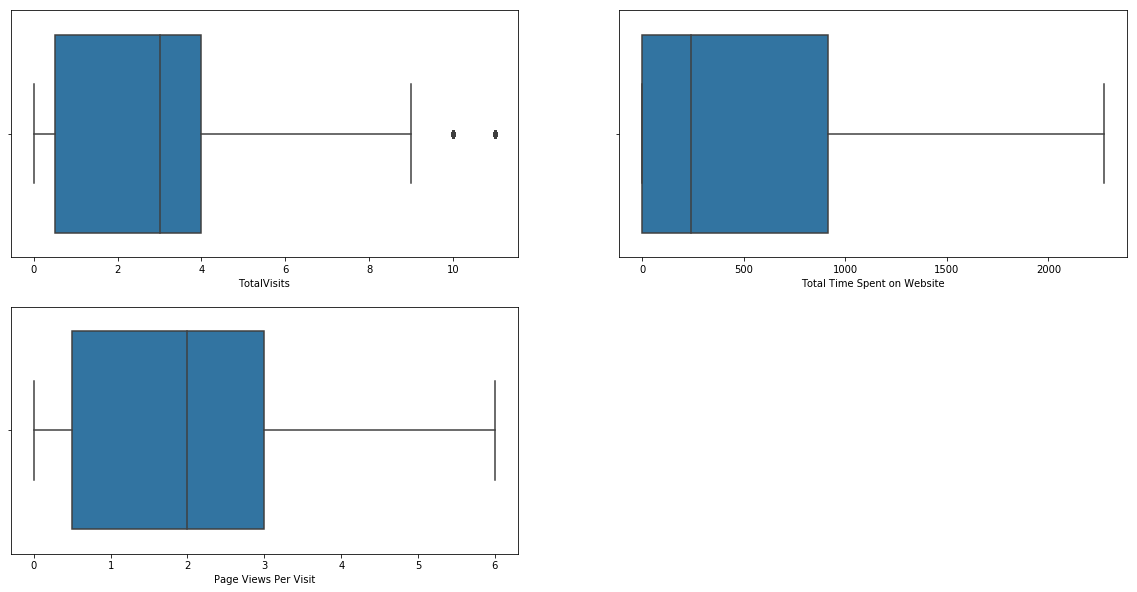

In [295]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.boxplot(leads['TotalVisits'])

plt.subplot(2,2,2)
sns.boxplot(leads['Total Time Spent on Website'])

plt.subplot(2,2,3)
sns.boxplot(leads['Page Views Per Visit'])

In [296]:
leads.shape

(8643, 105)

We have removed most of the outliers and so we can proceed with model building

In [297]:
# Lets look at the head of the dataframe again
leads.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,660737,0,0,0,0.00,0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,660728,0,0,0,5.00,674,2.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.00,1532,2.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,660719,0,0,0,1.00,305,1.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,660681,0,0,1,2.00,1428,1.00,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [298]:
# Lets look at the info of the dataframe again
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8643 entries, 0 to 9239
Columns: 105 entries, Lead Number to City_Tier II Cities
dtypes: float64(2), int64(12), uint8(91)
memory usage: 1.7 MB


### Splitting the data into Training and Test datasets

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
X = leads.drop(['Lead Number', 'Converted'], axis = 1)
y = leads['Converted']

In [301]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.00,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.00,1532,2.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1.00,305,1.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,2.00,1428,1.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [302]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [303]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [304]:
from sklearn.preprocessing import StandardScaler

In [305]:
scaler = StandardScaler()

In [306]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [307]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
5720,0,0,0.50,1.97,1.16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7026,0,0,-1.17,-0.88,-1.27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6968,0,0,1.33,1.27,-0.05,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
5016,0,0,-1.17,-0.88,-1.27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6653,0,0,-0.34,0.71,-0.05,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [308]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [309]:
round((y.sum()/len(y))*100,2) 

38.22

As we can see we have 38% conversion rate

# Model building

In [310]:
import statsmodels.api as sm

In [311]:
# logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     5955
Model Family:                Binomial   Df Model:                           94
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 17 Nov 2019   Deviance:                          nan
Time:                        15:00:05   Pearson chi2:                 6.50e+18
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 6.531e+15    7.8e+07   8.38e+07      0.000    6.53e+15    6.53e+15
Do Not Email                                         -8.376e+14   4.83e+06  -1.73e+08      0.000   -8.38e+14   -8.38e+14
Do Not Call                                           4.671e+15   4.78e+07   9.77e+07      0.000    4.67e+15    4.67e+15
TotalVisits                                           1.642e+14   1.46e+06   1.13e+08      0.000    1.64e+14    1.64e+14
Total Time Spent on Website                           6.638e+14   1.02e+06   6.51e+08      0.000    6.64e+14    6.64e+14
Page Views Per Visit                                 -1.366e+14   1.61e+06  -8.47e+07      0.000   -1.37e+14   -1.37e+14
Search                                                1.238e+15    3.2e+07   3.87e+07      0.000    1.24e+15    1.24e+15
Newspaper Article                                     -244.5405   1.89e-06  -1.29e+08      0.000    -244.541    -244.541
X Education Forums                                    -332.8106   2.95e-06  -1.13e+08      0.000    -332.811    -332.811
Newspaper                                             -259.6907   1.98e-06  -1.31e+08      0.000    -259.691    -259.691
Digital Advertisement                                 2.531e+15   6.76e+07   3.75e+07      0.000    2.53e+15    2.53e+15
Through Recommendations                               6.378e+14   5.03e+07   1.27e+07      0.000    6.38e+14    6.38e+14
A free copy of Mastering The Interview               -8.676e+13    2.9e+06  -2.99e+07      0.000   -8.68e+13   -8.68e+13
Lead Origin_Landing Page Submission                   1.978e+14      4e+06   4.94e+07      0.000    1.98e+14    1.98e+14
Lead Origin_Lead Add Form                            -4.977e+15   6.73e+07  -7.39e+07      0.000   -4.98e+15   -4.98e+15
Lead Origin_Lead Import                               4.926e+15   6.87e+07   7.17e+07      0.000    4.93e+15    4.93e+15
Lead Source_Direct Traffic                           -8.684e+15   8.26e+07  -1.05e+08      0.000   -8.68e+15   -8.68e+15
Lead Source_Facebook                                 -1.198e+16   1.07e+08  -1.12e+08      0.000    -1.2e+16    -1.2e+16
Lead Source_Google                                   -8.495e+15   8.26e+07  -1.03e+08      0.000   -8.49e+15   -8.49e+15
Lead Source_Live Chat                                 1.637e+15   6.73e+07   2.43e+07      0.000    1.64e+15    1.64e+15
Lead Source_NC_EDM                                    -5.15e+15   1.07e+08  -4.83e+07      0.000   -5.15e+15   -5.15e+15
Lead Source_Olark Chat                                -8.52e+15   8.25e+07  -1.03e+08      0.000   -8.52e+15   -8.52e+15
Lead Source_Organic Search                            -8.65e+15   8.27e+07  -1.05e+08      0.000   -8.65e+15   -8.65e+15
Lead Source_Pay 

## Feature selestion using RFE

In [312]:
from sklearn.linear_model import LogisticRegression

In [313]:
logreg = LogisticRegression()

In [314]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20) # running RFE with 20 variables
rfe = rfe.fit(X_train,y_train)

In [315]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [316]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 40),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 41),
 ('Search', False, 5),
 ('Newspaper Article', False, 80),
 ('X Education Forums', False, 79),
 ('Newspaper', False, 78),
 ('Digital Advertisement', False, 43),
 ('Through Recommendations', False, 70),
 ('A free copy of Mastering The Interview', False, 39),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 55),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_NC_EDM', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Pay per Click Ads', False, 56),
 ('Lead Source_Press_Release', False, 77),
 ('Lead Source_Reference', False, 76),
 ('Lead Source_Referral Sites', False, 

In [317]:
col = X_train.columns[rfe.support_]

In [318]:
X_train.columns[~rfe.support_] # rfe.support_ = false 

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Country_India', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam

#### Assessing the model with StatsModels

In [319]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6029
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2235.2
Date:                Sun, 17 Nov 2019   Deviance:                       4470.5
Time:                        15:00:12   Pearson chi2:                 6.10e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2473      0.100    -22.445      0.000      -2.444      -2.051
Do Not Email                                            -1.3801      0.187     -7.365      0.000      -1.747      -1.013
Total Time Spent on Website                              1.0555      0.043     24.473      0.000       0.971       1.140
Lead Origin_Lead Add Form                                3.0421      0.207     14.673      0.000       2.636       3.448
Lead Source_Olark Chat                                   1.3978      0.113     12.372      0.000       1.176       1.619
Lead Source_Welingak Website                             3.3254      1.029      3.231      0.001       1.308       5.343
Last Notable Activity_Had a Phone Conversation          23.8778    2.5e+04      0.001      0.999    -4.9e+04    4.91e+04
Last Notable Activity_Modified                          -0.7745      0.088     -8.822      0.000      -0.947      -0.602
Last Notable Activity_Unreachable                        2.0367      0.654      3.113      0.002       0.754       3.319
Last Activity_Approached upfront                        23.4496   3.23e+04      0.001      0.999   -6.33e+04    6.34e+04
Last Activity_Olark Chat Conversation                   -1.1444      0.194     -5.906      0.000      -1.524      -0.765
Last Activity_SMS Sent                                   1.3973      0.081     17.159      0.000       1.238       1.557
What is your current occupation_Housewife               24.5908   2.76e+04      0.001      0.999    -5.4e+04    5.41e+04
What is your current occupation_Other                    1.7484      0.833      2.098      0.036       0.115       3.382
What is your current occupation_Student                  1.6418      0.295      5.557      0.000       1.063       2.221
What is your current occupation_Unemployed               0.9283      0.095      9.750      0.000       0.742       1.115
What is your current occupation_Working Professional     3.1928      0.213     14.963      0.000       2.775       3.611
Lead Profile_Dual Specialization Student                23.4319   1.91e+04      0.001      0.999   -3.75e+04    3.76e+04
Lead Profile_Lateral Student                             2.0576      1.133      1.816      0.069      -0.163       4.278
Lead Profile_Potential Lead                              1.4931      0.108     13.868      0.000       1.282       1.704
Lead Profile_Student of SomeSchool                      -2.6110      0.492     -5.310      0.000      -3.575      -1.647
========================================================================================================================
"""

In [320]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720   0.50
7026   0.14
6968   0.82
5016   0.41
6653   0.69
7157   0.81
2521   0.70
920    0.02
4731   0.36
134    0.99
dtype: float64

In [321]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.49771171, 0.14493614, 0.81896403, 0.40669952, 0.69482853,
       0.81370449, 0.70360948, 0.0242735 , 0.35904881, 0.99372502])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [322]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.50,5720
1,0,0.14,7026
2,1,0.82,6968
3,1,0.41,5016
4,1,0.69,6653


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [323]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,1,0.50,5720,0
1,0,0.14,7026,0
2,1,0.82,6968,1
3,1,0.41,5016,0
4,1,0.69,6653,1


In [324]:
from sklearn import metrics

In [325]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3357  399]
 [ 634 1660]]


In [326]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8292561983471074


Our model has about 83% accuracy

### Checking VIFs

In [327]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [328]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,1.94
2,Lead Origin_Lead Add Form,1.66
3,Lead Source_Olark Chat,1.65
6,Last Notable Activity_Modified,1.61
9,Last Activity_Olark Chat Conversation,1.59
18,Lead Profile_Potential Lead,1.54
10,Last Activity_SMS Sent,1.46
15,What is your current occupation_Working Profes...,1.40
4,Lead Source_Welingak Website,1.29
1,Total Time Spent on Website,1.28


##### Our variables do not have high VIF which is good as it indicates we do not have multicolinearity issues to deal with

The variable 'What is your current occupation_Housewife' has high high P-value. So let's start by dropping that.

In [329]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Last Activity_Approached upfront',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool'],
      dtype='object')

In [330]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6030
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2243.4
Date:                Sun, 17 Nov 2019   Deviance:                       4486.8
Time:                        15:00:14   Pearson chi2:                 6.14e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2133      0.099    -22.358      0.000      -2.407      -2.019
Do Not Email                                            -1.3866      0.187     -7.398      0.000      -1.754      -1.019
Total Time Spent on Website                              1.0555      0.043     24.514      0.000       0.971       1.140
Lead Origin_Lead Add Form                                3.0921      0.208     14.899      0.000       2.685       3.499
Lead Source_Olark Chat                                   1.3885      0.113     12.320      0.000       1.168       1.609
Lead Source_Welingak Website                             3.2773      1.029      3.184      0.001       1.260       5.295
Last Notable Activity_Had a Phone Conversation          23.8754    2.5e+04      0.001      0.999    -4.9e+04    4.91e+04
Last Notable Activity_Modified                          -0.7731      0.088     -8.828      0.000      -0.945      -0.601
Last Notable Activity_Unreachable                        2.0198      0.654      3.091      0.002       0.739       3.301
Last Activity_Approached upfront                        23.4454   3.22e+04      0.001      0.999   -6.31e+04    6.32e+04
Last Activity_Olark Chat Conversation                   -1.1544      0.194     -5.962      0.000      -1.534      -0.775
Last Activity_SMS Sent                                   1.3874      0.081     17.069      0.000       1.228       1.547
What is your current occupation_Other                    1.7175      0.833      2.061      0.039       0.084       3.351
What is your current occupation_Student                  1.6064      0.295      5.437      0.000       1.027       2.185
What is your current occupation_Unemployed               0.8961      0.094      9.503      0.000       0.711       1.081
What is your current occupation_Working Professional     3.1577      0.213     14.829      0.000       2.740       3.575
Lead Profile_Dual Specialization Student                23.4379   1.92e+04      0.001      0.999   -3.75e+04    3.76e+04
Lead Profile_Lateral Student                             2.0352      1.135      1.794      0.073      -0.189       4.259
Lead Profile_Potential Lead                              1.5006      0.108     13.943      0.000       1.290       1.712
Lead Profile_Student of SomeSchool                      -2.6124      0.493     -5.301      0.000      -3.578      -1.647
========================================================================================================================
"""

In [331]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720   0.50
7026   0.15
6968   0.82
5016   0.41
6653   0.69
7157   0.81
2521   0.71
920    0.02
4731   0.36
134    0.99
dtype: float64

In [332]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.49850959, 0.1480398 , 0.82035236, 0.41031155, 0.69312495,
       0.81106019, 0.70556476, 0.02466   , 0.36121439, 0.99375651])

In [333]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.50,5720
1,0,0.15,7026
2,1,0.82,6968
3,1,0.41,5016
4,1,0.69,6653


In [334]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,1,0.50,5720,0
1,0,0.15,7026,0
2,1,0.82,6968,1
3,1,0.41,5016,0
4,1,0.69,6653,1


In [335]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3356  400]
 [ 640 1654]]


In [336]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.828099173553719


So the overall accuracy hasn't dropped after dropping the 'What is your current occupation_Housewife' column 

In [337]:
#### Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,1.94
2,Lead Origin_Lead Add Form,1.65
3,Lead Source_Olark Chat,1.65
6,Last Notable Activity_Modified,1.61
9,Last Activity_Olark Chat Conversation,1.59
17,Lead Profile_Potential Lead,1.54
10,Last Activity_SMS Sent,1.46
14,What is your current occupation_Working Profes...,1.40
4,Lead Source_Welingak Website,1.29
1,Total Time Spent on Website,1.28


The variable 'Last Activity_Approached upfront' has very high P-value. So we will drop that

In [338]:
col = col.drop('Last Activity_Approached upfront', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6031
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2245.5
Date:                Sun, 17 Nov 2019   Deviance:                       4491.0
Time:                        15:00:15   Pearson chi2:                 6.15e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2164      0.099    -22.386      0.000      -2.410      -2.022
Do Not Email                                            -1.3887      0.187     -7.409      0.000      -1.756      -1.021
Total Time Spent on Website                              1.0557      0.043     24.531      0.000       0.971       1.140
Lead Origin_Lead Add Form                                3.1017      0.207     14.976      0.000       2.696       3.508
Lead Source_Olark Chat                                   1.3961      0.113     12.395      0.000       1.175       1.617
Lead Source_Welingak Website                             3.2663      1.029      3.173      0.002       1.249       5.284
Last Notable Activity_Had a Phone Conversation          23.8754    2.5e+04      0.001      0.999    -4.9e+04    4.91e+04
Last Notable Activity_Modified                          -0.7667      0.087     -8.765      0.000      -0.938      -0.595
Last Notable Activity_Unreachable                        2.0212      0.654      3.092      0.002       0.740       3.302
Last Activity_Olark Chat Conversation                   -1.1626      0.194     -6.007      0.000      -1.542      -0.783
Last Activity_SMS Sent                                   1.3853      0.081     17.048      0.000       1.226       1.545
What is your current occupation_Other                    1.7169      0.834      2.060      0.039       0.083       3.351
What is your current occupation_Student                  1.6075      0.295      5.441      0.000       1.028       2.187
What is your current occupation_Unemployed               0.8996      0.094      9.543      0.000       0.715       1.084
What is your current occupation_Working Professional     3.1592      0.213     14.837      0.000       2.742       3.576
Lead Profile_Dual Specialization Student                23.4344   1.92e+04      0.001      0.999   -3.75e+04    3.76e+04
Lead Profile_Lateral Student                             2.0277      1.135      1.786      0.074      -0.198       4.253
Lead Profile_Potential Lead                              1.4981      0.108     13.926      0.000       1.287       1.709
Lead Profile_Student of SomeSchool                      -2.6148      0.493     -5.305      0.000      -3.581      -1.649
========================================================================================================================
"""

In [339]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720   0.50
7026   0.15
6968   0.82
5016   0.41
6653   0.69
7157   0.81
2521   0.71
920    0.02
4731   0.36
134    0.99
dtype: float64

In [340]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.50034266, 0.14858235, 0.82009246, 0.41085758, 0.69281476,
       0.81112925, 0.70516623, 0.0247215 , 0.36069198, 0.99379206])

In [341]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.50,5720
1,0,0.15,7026
2,1,0.82,6968
3,1,0.41,5016
4,1,0.69,6653


In [342]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,1,0.50,5720,1
1,0,0.15,7026,0
2,1,0.82,6968,1
3,1,0.41,5016,0
4,1,0.69,6653,1


In [343]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3356  400]
 [ 640 1654]]


In [344]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.828099173553719


Again the accuracy hasn't dropped after dropping the above feature column

In [345]:
#### Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,1.94
3,Lead Source_Olark Chat,1.65
2,Lead Origin_Lead Add Form,1.64
6,Last Notable Activity_Modified,1.61
8,Last Activity_Olark Chat Conversation,1.58
16,Lead Profile_Potential Lead,1.54
9,Last Activity_SMS Sent,1.46
13,What is your current occupation_Working Profes...,1.40
4,Lead Source_Welingak Website,1.29
1,Total Time Spent on Website,1.28


The variable 'Lead Profile_Dual Specialization Student' has very high P-value. So we will drop that

In [346]:
col = col.drop('Lead Profile_Dual Specialization Student', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6032
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2253.3
Date:                Sun, 17 Nov 2019   Deviance:                       4506.7
Time:                        15:00:16   Pearson chi2:                 6.16e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2163      0.099    -22.403      0.000      -2.410      -2.022
Do Not Email                                            -1.3710      0.186     -7.377      0.000      -1.735      -1.007
Total Time Spent on Website                              1.0569      0.043     24.573      0.000       0.973       1.141
Lead Origin_Lead Add Form                                3.0947      0.207     14.948      0.000       2.689       3.501
Lead Source_Olark Chat                                   1.4015      0.112     12.467      0.000       1.181       1.622
Lead Source_Welingak Website                             3.2626      1.029      3.170      0.002       1.245       5.280
Last Notable Activity_Had a Phone Conversation          22.8643   1.52e+04      0.002      0.999   -2.97e+04    2.97e+04
Last Notable Activity_Modified                          -0.7685      0.087     -8.802      0.000      -0.940      -0.597
Last Notable Activity_Unreachable                        2.0176      0.654      3.087      0.002       0.737       3.299
Last Activity_Olark Chat Conversation                   -1.1711      0.194     -6.050      0.000      -1.551      -0.792
Last Activity_SMS Sent                                   1.3820      0.081     17.037      0.000       1.223       1.541
What is your current occupation_Other                    1.7140      0.834      2.056      0.040       0.080       3.348
What is your current occupation_Student                  1.6697      0.294      5.675      0.000       1.093       2.246
What is your current occupation_Unemployed               0.9098      0.094      9.661      0.000       0.725       1.094
What is your current occupation_Working Professional     3.1839      0.212     15.000      0.000       2.768       3.600
Lead Profile_Lateral Student                             2.0199      1.135      1.779      0.075      -0.205       4.245
Lead Profile_Potential Lead                              1.4864      0.107     13.827      0.000       1.276       1.697
Lead Profile_Student of SomeSchool                      -2.6450      0.493     -5.365      0.000      -3.611      -1.679
========================================================================================================================
"""

In [347]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720   0.50
7026   0.15
6968   0.82
5016   0.41
6653   0.69
7157   0.81
2521   0.71
920    0.02
4731   0.36
134    0.99
dtype: float64

In [348]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.50304693, 0.14914507, 0.82009996, 0.41112063, 0.69447161,
       0.81264829, 0.70502869, 0.02457877, 0.36017175, 0.99378384])

In [349]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.50,5720
1,0,0.15,7026
2,1,0.82,6968
3,1,0.41,5016
4,1,0.69,6653


In [350]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
0,1,0.50,5720,1
1,0,0.15,7026,0
2,1,0.82,6968,1
3,1,0.41,5016,0
4,1,0.69,6653,1


In [351]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3355  401]
 [ 643 1651]]


In [352]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8274380165289256


Again the model accuracy hasn't decreased after removing the variable 'Lead Profile_Dual Specialization Student'

In [353]:
#### Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,1.94
3,Lead Source_Olark Chat,1.65
2,Lead Origin_Lead Add Form,1.64
6,Last Notable Activity_Modified,1.61
8,Last Activity_Olark Chat Conversation,1.58
15,Lead Profile_Potential Lead,1.54
9,Last Activity_SMS Sent,1.46
13,What is your current occupation_Working Profes...,1.39
4,Lead Source_Welingak Website,1.29
1,Total Time Spent on Website,1.28


The variable 'Lead Profile_Lateral Student' has very high P-value. So we will drop that!

In [354]:
col = col.drop('Lead Profile_Lateral Student', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6033
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2255.7
Date:                Sun, 17 Nov 2019   Deviance:                       4511.3
Time:                        15:00:18   Pearson chi2:                 6.20e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2158      0.099    -22.406      0.000      -2.410      -2.022
Do Not Email                                            -1.3767      0.186     -7.400      0.000      -1.741      -1.012
Total Time Spent on Website                              1.0579      0.043     24.624      0.000       0.974       1.142
Lead Origin_Lead Add Form                                3.1434      0.207     15.187      0.000       2.738       3.549
Lead Source_Olark Chat                                   1.4027      0.112     12.495      0.000       1.183       1.623
Lead Source_Welingak Website                             3.2535      1.029      3.162      0.002       1.237       5.270
Last Notable Activity_Had a Phone Conversation          22.8593   1.52e+04      0.002      0.999   -2.97e+04    2.97e+04
Last Notable Activity_Modified                          -0.7641      0.087     -8.764      0.000      -0.935      -0.593
Last Notable Activity_Unreachable                        2.0159      0.654      3.084      0.002       0.735       3.297
Last Activity_Olark Chat Conversation                   -1.1774      0.194     -6.084      0.000      -1.557      -0.798
Last Activity_SMS Sent                                   1.3762      0.081     16.976      0.000       1.217       1.535
What is your current occupation_Other                    1.7118      0.834      2.053      0.040       0.077       3.346
What is your current occupation_Student                  1.6693      0.295      5.667      0.000       1.092       2.247
What is your current occupation_Unemployed               0.9150      0.094      9.721      0.000       0.730       1.099
What is your current occupation_Working Professional     3.1948      0.212     15.074      0.000       2.779       3.610
Lead Profile_Potential Lead                              1.4767      0.107     13.749      0.000       1.266       1.687
Lead Profile_Student of SomeSchool                      -2.6536      0.494     -5.371      0.000      -3.622      -1.685
========================================================================================================================
"""

In [355]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720   0.51
7026   0.15
6968   0.82
5016   0.41
6653   0.69
7157   0.81
2521   0.70
920    0.02
4731   0.36
134    0.99
dtype: float64

In [356]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
5720,1,0.51,5720
7026,0,0.15,7026
6968,1,0.82,6968
5016,1,0.41,5016
6653,1,0.69,6653


In [357]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
5720,1,0.51,5720,1
7026,0,0.15,7026,0
6968,1,0.82,6968,1
5016,1,0.41,5016,0
6653,1,0.69,6653,1


In [358]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3353  403]
 [ 640 1654]]


In [359]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.827603305785124


Again the model accuracy hasn't decreased which is still around 83%

In [360]:
#### Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,1.94
3,Lead Source_Olark Chat,1.65
2,Lead Origin_Lead Add Form,1.63
6,Last Notable Activity_Modified,1.61
8,Last Activity_Olark Chat Conversation,1.58
14,Lead Profile_Potential Lead,1.53
9,Last Activity_SMS Sent,1.46
13,What is your current occupation_Working Profes...,1.39
4,Lead Source_Welingak Website,1.29
1,Total Time Spent on Website,1.28


The variable 'Last Notable Activity_Had a Phone Conversation' has very high P-value. So we will drop that

In [361]:
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6034
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2261.0
Date:                Sun, 17 Nov 2019   Deviance:                       4522.0
Time:                        15:00:19   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2080      0.099    -22.366      0.000      -2.402      -2.015
Do Not Email                                            -1.3798      0.186     -7.419      0.000      -1.744      -1.015
Total Time Spent on Website                              1.0565      0.043     24.617      0.000       0.972       1.141
Lead Origin_Lead Add Form                                3.1364      0.207     15.157      0.000       2.731       3.542
Lead Source_Olark Chat                                   1.3954      0.112     12.444      0.000       1.176       1.615
Lead Source_Welingak Website                             3.2522      1.029      3.160      0.002       1.235       5.269
Last Notable Activity_Modified                          -0.7703      0.087     -8.842      0.000      -0.941      -0.600
Last Notable Activity_Unreachable                        2.0060      0.654      3.069      0.002       0.725       3.287
Last Activity_Olark Chat Conversation                   -1.1784      0.194     -6.089      0.000      -1.558      -0.799
Last Activity_SMS Sent                                   1.3680      0.081     16.895      0.000       1.209       1.527
What is your current occupation_Other                    1.7104      0.834      2.051      0.040       0.076       3.345
What is your current occupation_Student                  1.6685      0.294      5.665      0.000       1.091       2.246
What is your current occupation_Unemployed               0.9197      0.094      9.779      0.000       0.735       1.104
What is your current occupation_Working Professional     3.2015      0.212     15.127      0.000       2.787       3.616
Lead Profile_Potential Lead                              1.4746      0.107     13.749      0.000       1.264       1.685
Lead Profile_Student of SomeSchool                      -2.6600      0.494     -5.385      0.000      -3.628      -1.692
========================================================================================================================
"""

In [362]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720   0.51
7026   0.15
6968   0.82
5016   0.41
6653   0.70
7157   0.81
2521   0.71
920    0.02
4731   0.36
134    0.99
dtype: float64

In [363]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
5720,1,0.51,5720
7026,0,0.15,7026
6968,1,0.82,6968
5016,1,0.41,5016
6653,1,0.70,6653


In [364]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted
5720,1,0.51,5720,1
7026,0,0.15,7026,0
6968,1,0.82,6968,1
5016,1,0.41,5016,0
6653,1,0.70,6653,1


In [365]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3349  407]
 [ 642 1652]]


In [366]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8266115702479339


In [367]:
#### Checking VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,1.93
3,Lead Source_Olark Chat,1.65
2,Lead Origin_Lead Add Form,1.63
5,Last Notable Activity_Modified,1.61
7,Last Activity_Olark Chat Conversation,1.58
13,Lead Profile_Potential Lead,1.53
8,Last Activity_SMS Sent,1.45
12,What is your current occupation_Working Profes...,1.38
4,Lead Source_Welingak Website,1.29
1,Total Time Spent on Website,1.28


#### 1. We can see that now most of our P-values for all our variables are less than 0.05 which indicates that these variables are statistically significant so we do not need to drop more feature variables
#### 2. Also the accuracy of our model hasn't dropped even after removing so many of the feature columns at around 82.6%

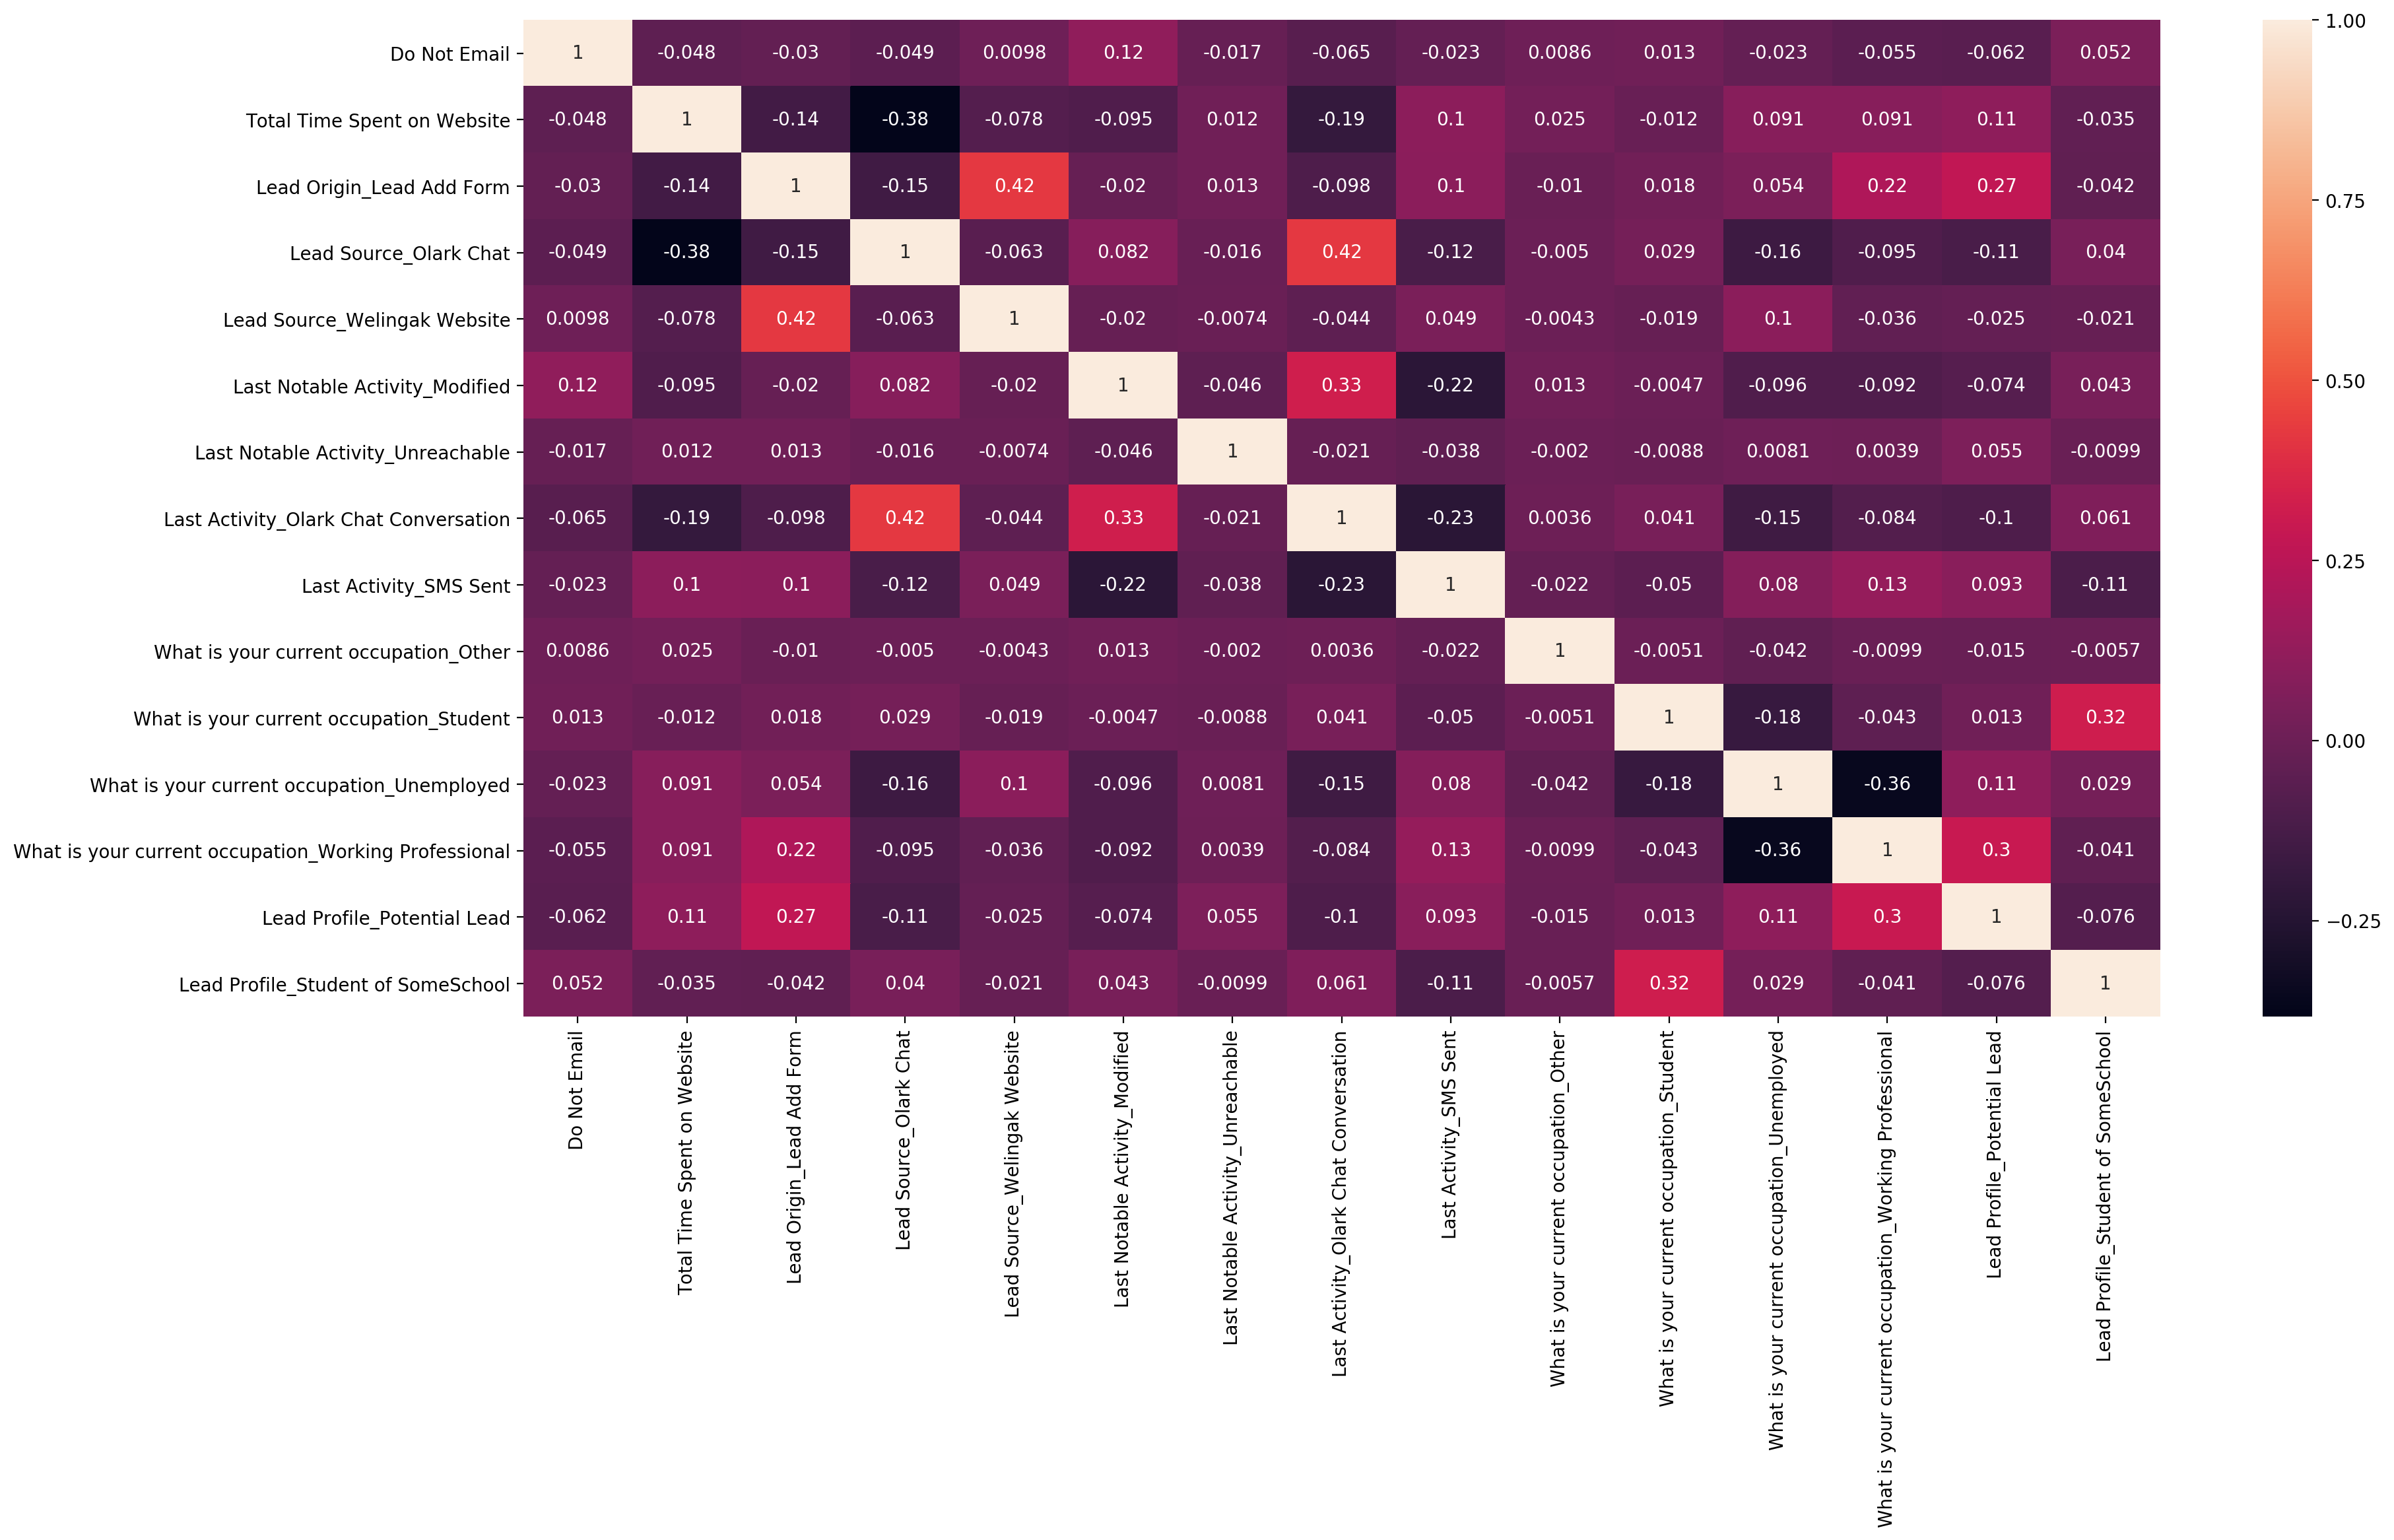

In [368]:
# correlation matrix 
plt.figure(figsize = (20,10),dpi=200)  
sns.heatmap(X_train[col].corr(),annot = True)
plt.show()

### Metrics beyond simply accuracy

In [369]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [370]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7201394943330427

In [371]:
# Let us calculate specificity
TN / float(TN+FP)

0.891640042598509

In [372]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10835995740149094


In [373]:
# positive predictive value 
print (TP / float(TP+FP))

0.8023312287518213


In [374]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8391380606364319


### Plotting the ROC Curve

In [375]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (RoC) curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [376]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate = False )

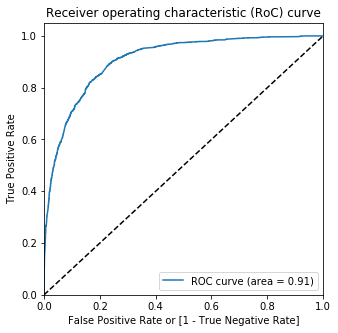

In [377]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

##### Area under the ROC curve is 0.91

### Finding Optimal Cutoff Point

In [378]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5720,1,0.51,5720,1,1,1,1,1,1,1,0,0,0,0
7026,0,0.15,7026,0,1,1,0,0,0,0,0,0,0,0
6968,1,0.82,6968,1,1,1,1,1,1,1,1,1,1,0
5016,1,0.41,5016,0,1,1,1,1,1,0,0,0,0,0
6653,1,0.70,6653,1,1,1,1,1,1,1,1,0,0,0
7157,0,0.81,7157,1,1,1,1,1,1,1,1,1,1,0
2521,1,0.71,2521,1,1,1,1,1,1,1,1,1,0,0
920,0,0.02,920,0,1,0,0,0,0,0,0,0,0,0
4731,1,0.36,4731,0,1,1,1,1,0,0,0,0,0,0
134,1,0.99,134,1,1,1,1,1,1,1,1,1,1,1


In [379]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.67   0.98   0.49
0.20  0.20      0.79   0.92   0.71
0.30  0.30      0.82   0.88   0.77
0.40  0.40      0.83   0.80   0.85
0.50  0.50      0.83   0.72   0.89
0.60  0.60      0.82   0.67   0.92
0.70  0.70      0.81   0.58   0.95
0.80  0.80      0.78   0.47   0.97
0.90  0.90      0.74   0.33   0.99


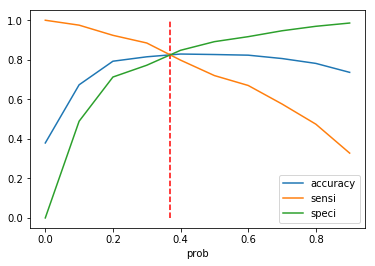

In [380]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.37, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

#### From the above curve, 0.37 seems to be the optimum point to take as the cutoff probability

In [381]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5720,1,0.51,5720,1,1,1,1,1,1,1,0,0,0,0,1
7026,0,0.15,7026,0,1,1,0,0,0,0,0,0,0,0,0
6968,1,0.82,6968,1,1,1,1,1,1,1,1,1,1,0,1
5016,1,0.41,5016,0,1,1,1,1,1,0,0,0,0,0,1
6653,1,0.70,6653,1,1,1,1,1,1,1,1,0,0,0,1


In [382]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8290909090909091

In [383]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3132,  624],
       [ 410, 1884]], dtype=int64)

In [384]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [385]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8212728857890148

In [386]:
# Let us calculate specificity
TN / float(TN+FP)

0.8338658146964856

In [387]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16613418530351437


In [388]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7511961722488039


In [389]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8842461885940147


### Precision and Recall

Precision: 
TP / TP + FP

In [390]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7511961722488039

Recall: TP / TP + FN

In [391]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8212728857890148

In [392]:
from sklearn.metrics import precision_score, recall_score

In [393]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8023312287518213

In [394]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7201394943330427

In [395]:
from sklearn.metrics import precision_recall_curve

In [396]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

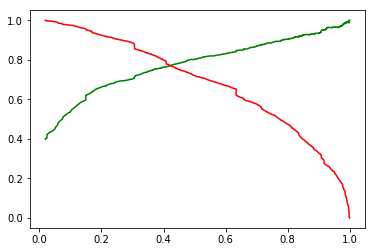

In [397]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [398]:
from sklearn.metrics import classification_report

In [399]:
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      3756
           1       0.75      0.82      0.78      2294

   micro avg       0.83      0.83      0.83      6050
   macro avg       0.82      0.83      0.82      6050
weighted avg       0.83      0.83      0.83      6050



## Making predictions on the test set

In [400]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
378,0,0,-0.34,-0.19,-0.05,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321,1,0,0.50,1.70,1.16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7646,0,0,0.50,-0.22,-0.46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6317,0,0,-1.17,-0.88,-1.27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1241,0,0,-1.17,-0.88,-1.27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [401]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
378,0,-0.19,0,0,0,0,0,0,0,0,0,0,0,0,0
321,1,1.70,0,0,0,1,0,0,0,0,0,1,0,0,0
7646,0,-0.22,0,0,0,0,0,0,1,0,0,1,0,0,0
6317,0,-0.88,0,1,0,1,0,1,0,0,0,0,0,0,0
1241,0,-0.88,0,1,0,1,0,0,0,0,0,0,0,0,0


In [402]:
# adding constant for statsmodel
X_test_sm = sm.add_constant(X_test)

In [403]:
# making prediction on the test set
y_test_pred = res.predict(X_test_sm)

In [404]:
y_test_pred[:10]

378    0.08
321    0.16
7646   0.46
6317   0.02
1241   0.08
1235   0.02
123    0.02
6449   0.49
6269   0.96
8463   0.02
dtype: float64

In [405]:
# Converting y_pred to a dataframe which is an array
y_pred = pd.DataFrame(y_test_pred)

In [406]:
y_pred.head()

,0
378,0.08
321,0.16
7646,0.46
6317,0.02
1241,0.08


In [407]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [408]:
y_test_df.head()

,Converted
378,0
321,0
7646,0
6317,0
1241,0


In [409]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index
y_test_df.head()

,Converted,LeadID
378,0,378
321,0,321
7646,0,7646
6317,0,6317
1241,0,1241


In [410]:
# concatenating both the prediction and the orginal labels
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [411]:
y_pred_final.head()

,Converted,LeadID,0
378,0,378,0.08
321,0,321,0.16
7646,0,7646,0.46
6317,0,6317,0.02
1241,0,1241,0.08


In [412]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conversion_Prob'], axis=1)

y_pred_final.head()

,LeadID,Converted,Conversion_Prob
378,378,0,0.08
321,321,0,0.16
7646,7646,0,0.46
6317,6317,0,0.02
1241,1241,0,0.08


In [413]:
y_pred_final['Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [414]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,Predicted
378,378,0,0.08,0
321,321,0,0.16,0
7646,7646,0,0.46,1
6317,6317,0,0.02,0
1241,1241,0,0.08,0


In [415]:
# Let's check the overall accuracy.
accuracy_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted)
accuracy_score

0.8202853837254146

#### Confusion matrix

In [416]:
confusion_test_set = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted)
print(confusion_test_set)

[[1319  265]
 [ 201  808]]


In [417]:
TP = confusion_test_set[1,1] # true positive 
TN = confusion_test_set[0,0] # true negatives
FP = confusion_test_set[0,1] # false positives
FN = confusion_test_set[1,0] # false negatives

#### Sensitivity

In [418]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.800792864222002

#### Specificity

In [419]:
# Let us calculate specificity
TN / float(TN+FP)

0.8327020202020202

#### False Postive Rate

In [420]:
# Calculate false postive rate - predicting converion when customer does not have converted
print(FP/ float(TN+FP))

0.1672979797979798


#### Positive Predicted Value

In [421]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7530288909599254


#### Negative Predicted Value

In [422]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8677631578947368


#### Precision

In [423]:
#precision
confusion_test_set[1,1]/(confusion_test_set[0,1]+confusion_test_set[1,1])

0.7530288909599254

#### Recall

In [424]:
#recall
confusion_test_set[1,1]/(confusion_test_set[1,0]+confusion_test_set[1,1])

0.800792864222002

#### Classification Report

In [425]:
from sklearn.metrics import classification_report

In [426]:
print(classification_report(y_pred_final.Converted, y_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1584
           1       0.75      0.80      0.78      1009

   micro avg       0.82      0.82      0.82      2593
   macro avg       0.81      0.82      0.81      2593
weighted avg       0.82      0.82      0.82      2593



#### Precision recall curve

In [427]:
from sklearn.metrics import precision_recall_curve

In [428]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)

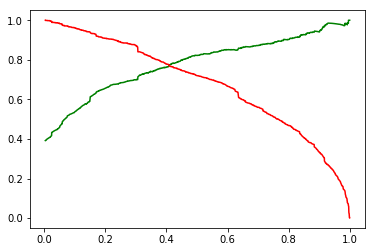

In [429]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Plotting the ROC Curve for Test Dataset

In [430]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds


In [431]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False)

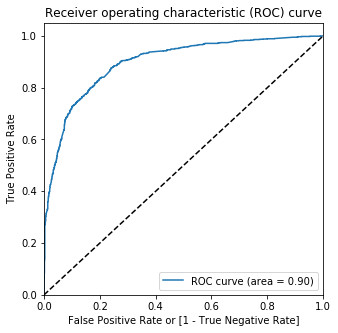

(array([0.        , 0.        , 0.        , ..., 0.99873737, 0.99936869,
        1.        ]),
 array([0.00000000e+00, 9.91080278e-04, 1.98216056e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99927855e+00, 9.99278549e-01, 9.98578662e-01, ...,
        1.28270046e-03, 1.15129508e-03, 9.45533057e-04]))

In [432]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

##### Area under the ROC curve is around 0.9 which means our model seems to be doing well on the test set as well

In [433]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,Predicted
378,378,0,0.08,0
321,321,0,0.16,0
7646,7646,0,0.46,1
6317,6317,0,0.02,0
1241,1241,0,0.08,0


In [434]:
y_pred_final['Lead Score'] = y_pred_final['Conversion_Prob']*100
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,Predicted,Lead Score
378,378,0,0.08,0,8.26
321,321,0,0.16,0,16.25
7646,7646,0,0.46,1,46.19
6317,6317,0,0.02,0,2.44
1241,1241,0,0.08,0,7.52


In [435]:
y_pred_final = pd.merge(leads[['Lead Number']], y_pred_final,how='inner',left_index=True, right_index=True)

In [436]:
y_pred_final.head()  # test dataset with all the Lead Score values

,Lead Number,LeadID,Converted,Conversion_Prob,Predicted,Lead Score
0,660737,0,0,0.17,0,16.95
11,660570,11,1,0.59,1,59.40
14,660553,14,0,0.07,0,6.51
18,660522,18,1,0.74,1,74.03
24,660458,24,1,0.81,1,81.11


In [437]:
y_train_pred_df = y_train_pred_final[['Converted', 'Conversion_Prob', 'LeadID','Predicted']]
y_train_pred_df.head()

,Converted,Conversion_Prob,LeadID,Predicted
5720,1,0.51,5720,1
7026,0,0.15,7026,0
6968,1,0.82,6968,1
5016,1,0.41,5016,0
6653,1,0.70,6653,1


In [438]:
y_train_pred_df = pd.merge(leads[['Lead Number']], y_train_pred_df,how='inner',left_index=True, right_index=True)
y_train_pred_df.head()

,Lead Number,Converted,Conversion_Prob,LeadID,Predicted
1,660728,0,0.29,1,0
2,660727,1,0.95,2,1
3,660719,0,0.08,3,0
4,660681,1,0.44,4,0
5,660680,0,0.02,5,0


In [439]:
y_train_pred_df['Lead Score'] = y_train_pred_df['Conversion_Prob']*100

In [440]:
y_train_pred_df.head()     # train dataset with all the Lead Score values

,Lead Number,Converted,Conversion_Prob,LeadID,Predicted,Lead Score
1,660728,0,0.29,1,0,28.66
2,660727,1,0.95,2,1,95.12
3,660719,0,0.08,3,0,8.35
4,660681,1,0.44,4,0,44.39
5,660680,0,0.02,5,0,2.44


#### Final dataframe with all the Lead Scores

In [441]:
final_df_lead_score = pd.concat([y_train_pred_df,y_pred_final],axis=0)
final_df_lead_score.head()

,Conversion_Prob,Converted,Lead Number,Lead Score,LeadID,Predicted
1,0.29,0,660728,28.66,1,0
2,0.95,1,660727,95.12,2,1
3,0.08,0,660719,8.35,3,0
4,0.44,1,660681,44.39,4,0
5,0.02,0,660680,2.44,5,0


In [442]:
final_df_lead_score = final_df_lead_score.set_index('LeadID')

final_df_lead_score = final_df_lead_score[['Lead Number','Converted','Conversion_Prob','Predicted','Lead Score']]

## Final dataframe with the Lead Scores for all the LeadID

In [443]:
final_df_lead_score.head()  # final dataframe with all the Lead Scores

,Lead Number,Converted,Conversion_Prob,Predicted,Lead Score
LeadID,,,,,
1,660728,0,0.29,0,28.66
2,660727,1,0.95,1,95.12
3,660719,0,0.08,0,8.35
4,660681,1,0.44,0,44.39
5,660680,0,0.02,0,2.44


In [444]:
final_df_lead_score.shape

(8643, 5)

### Determining Feature Importance of our final model

In [445]:
# coefficients of our final model 

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.38
Total Time Spent on Website                             1.06
Lead Origin_Lead Add Form                               3.14
Lead Source_Olark Chat                                  1.40
Lead Source_Welingak Website                            3.25
Last Notable Activity_Modified                         -0.77
Last Notable Activity_Unreachable                       2.01
Last Activity_Olark Chat Conversation                  -1.18
Last Activity_SMS Sent                                  1.37
What is your current occupation_Other                   1.71
What is your current occupation_Student                 1.67
What is your current occupation_Unemployed              0.92
What is your current occupation_Working Professional    3.20
Lead Profile_Potential Lead                             1.47
Lead Profile_Student of SomeSchool                     -2.66
dtype: float64

In [446]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -42.43
Total Time Spent on Website                             32.48
Lead Origin_Lead Add Form                               96.44
Lead Source_Olark Chat                                  42.91
Lead Source_Welingak Website                           100.00
Last Notable Activity_Modified                         -23.69
Last Notable Activity_Unreachable                       61.68
Last Activity_Olark Chat Conversation                  -36.23
Last Activity_SMS Sent                                  42.06
What is your current occupation_Other                   52.59
What is your current occupation_Student                 51.30
What is your current occupation_Unemployed              28.28
What is your current occupation_Working Professional    98.44
Lead Profile_Potential Lead                             45.34
Lead Profile_Student of SomeSchool                     -81.79
dtype: float64

In [447]:
# Sorting the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')

#### Top three variables in your model which contribute most towards the probability of a lead getting converted

In [448]:
feature_importance_df = pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False)
feature_importance_df = feature_importance_df.rename(columns={'index':'Variables', 0:'Relative coeffient value'})
feature_importance_df = feature_importance_df.reset_index(drop=True)
feature_importance_df.head(3)

,Variables,Relative coeffient value
0,Lead Source_Welingak Website,100.00
1,What is your current occupation_Working Profes...,98.44
2,Lead Origin_Lead Add Form,96.44


### The top 3 variables are:
1. Lead Source_Welingak Website
2. What is your current occupation_Working Professional
3. Lead Origin_Lead Add Form